In [ ]:
#import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#libraries for decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
#read the file
df=pd.read_csv('Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


/tmp/ipython-input-4104920970.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(0,df['Attrition'].value_counts()[0],df['Attrition'].value_counts()[0],ha='center')
/tmp/ipython-input-4104920970.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(0,df['Attrition'].value_counts()[0],df['Attrition'].value_counts()[0],ha='center')
/tmp/ipython-input-4104920970.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.te

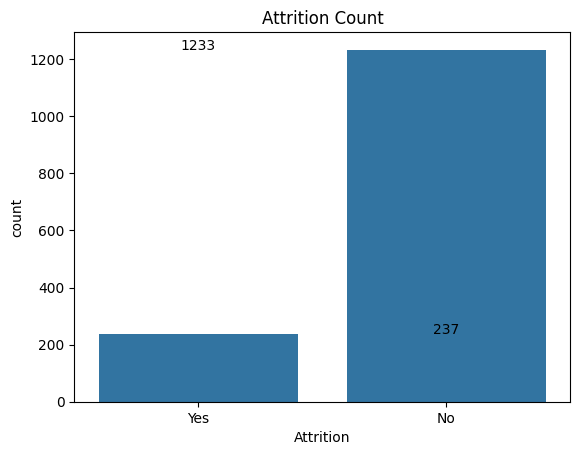

In [ ]:
sns.countplot(x='Attrition',data=df)
plt.title('Attrition Count')
plt.text(0,df['Attrition'].value_counts()[0],df['Attrition'].value_counts()[0],ha='center')
plt.text(1,df['Attrition'].value_counts()[1],df['Attrition'].value_counts()[1],ha='center')
plt.show()


Feature Engnirring

In [ ]:
#drop unnecessary columns
df=df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours','DailyRate','HourlyRate','MonthlyRate'])
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [ ]:
#convert the categorical include "object" coulumns into numarical columns
from sklearn.preprocessing import LabelEncoder
#select the object columns datatype
cat_cols=df.select_dtypes(include='object').columns
#apply the lable incoding
le=LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])
print(df[cat_cols].head())

   Attrition  BusinessTravel  Department  EducationField  Gender  JobRole  \
0          1               2           2               1       0        7   
1          0               1           1               1       1        6   
2          1               2           1               4       1        2   
3          0               1           1               1       0        6   
4          0               2           1               3       1        2   

   MaritalStatus  OverTime  
0              2         1  
1              1         0  
2              2         1  
3              1         1  
4              1         0  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int64
 9   JobInvolvement            1470 non-null   int64
 10  JobLevel                  1470 non-null   int64
 11  JobRole                   1470 non-null   int64
 12  JobSatisfaction           1470 non-null   int64
 13  MaritalStatus             1470 non-null   int64
 14  MonthlyIncome             1470 non-null 

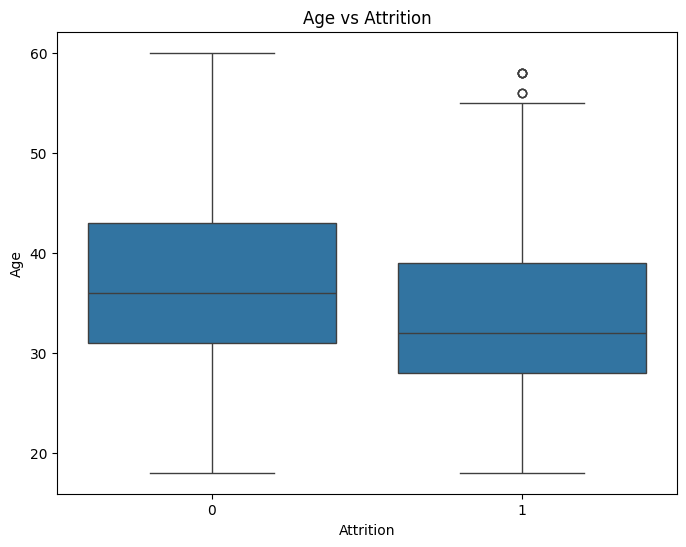

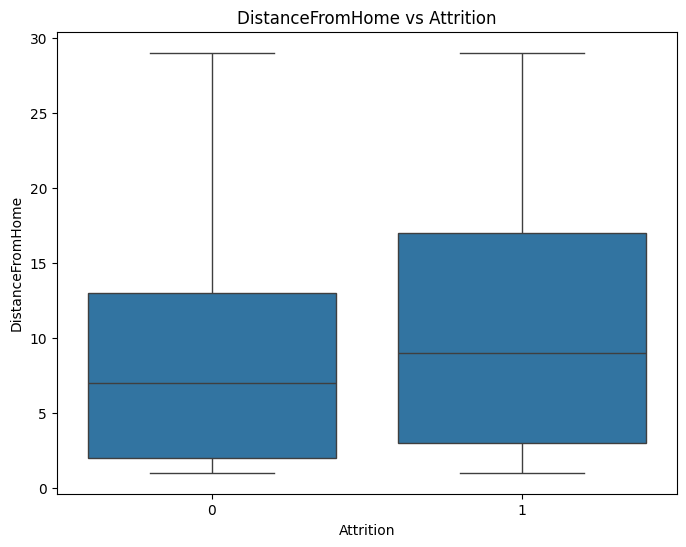

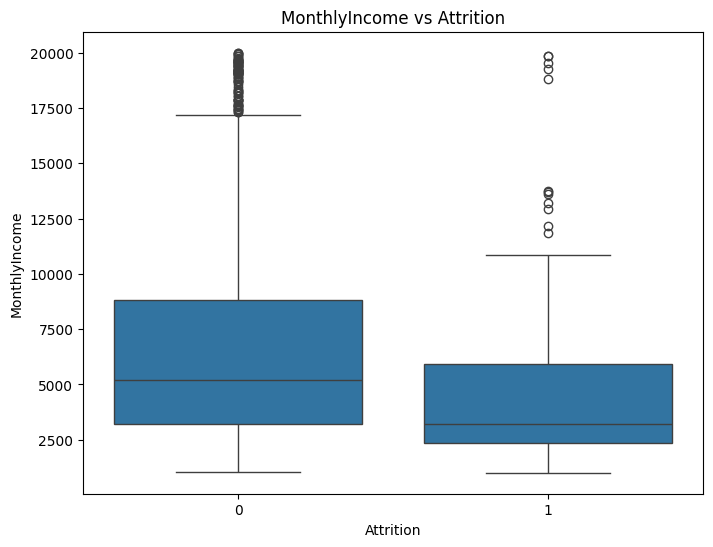

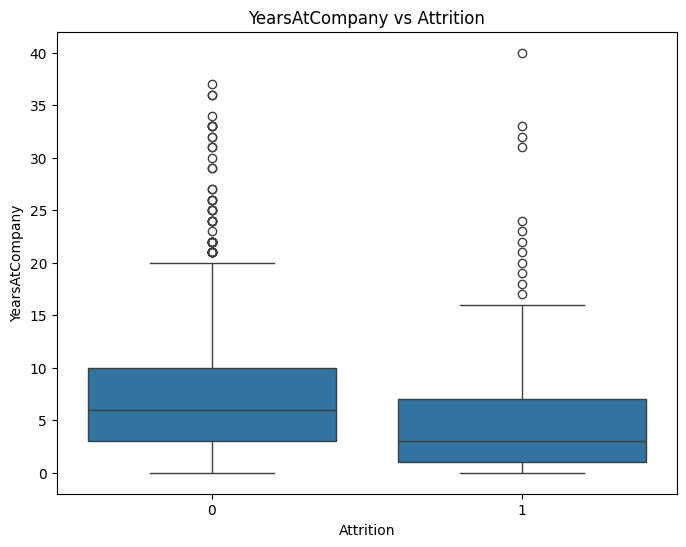

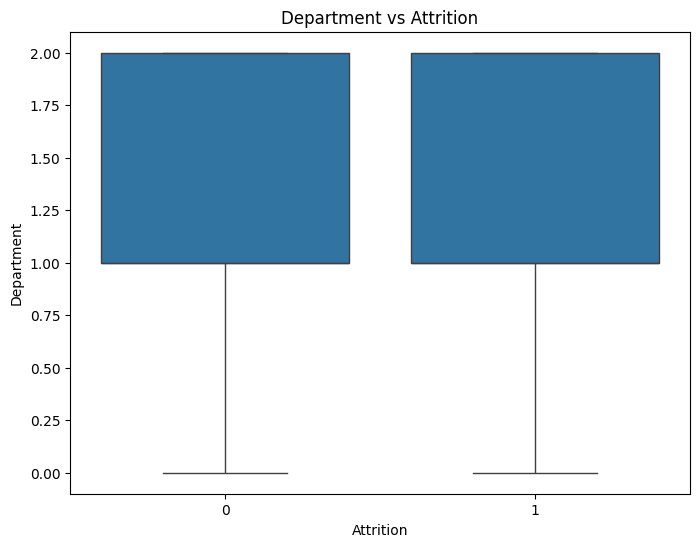

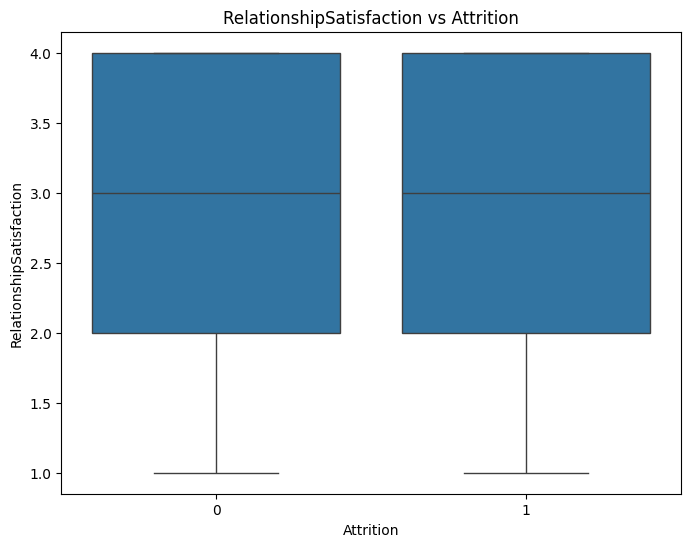

In [ ]:
#select most important columns to plot it with target by  boxplot
imp_col=["Age","DistanceFromHome","MonthlyIncome","YearsAtCompany","Department","RelationshipSatisfaction"]
for col in imp_col:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Attrition',y=col,data=df)
    plt.title(f'{col} vs Attrition')
    plt.show()


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,2,0,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,1,3,1,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,4,1,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,1,4,0,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,3,1,1,3,...,3,4,1,6,3,3,2,2,2,2


BUILD THE DECISION TREE

In [ ]:
#now i wont to build the decision trees
#define the target and feature
X=df.drop(columns=['Attrition'])
y=df['Attrition']


In [ ]:
#spilt the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(y.value_counts())

Attrition
0    1233
1     237
Name: count, dtype: int64


In [ ]:
#select randomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV
#select the pasibale parametors
param_dist={'max_depth':[3,5,7,10,None],
           'min_samples_split':[2,5,10,15],
           'min_samples_leaf':[1,2,5,10],
           'criterion':['gini','entropy']}
#build decision tree model
model=DecisionTreeClassifier(random_state=42)
#creat the randomizedsearchcv
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15]},
                   random_state=42, scoring='accuracy')

In [ ]:
#make prediction and evlute
y_pred=model.predict(X_test)
#make evaluate
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy}')
#randomizedsearchcv
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Accuracy:0.8537414965986394
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 3, 'criterion': 'entropy'}
Best Accuracy: 0.8384024522178146


In [ ]:
#feature importance
importance= pd.Series(random_search.best_estimator_.feature_importances_,index=X.columns)
importance=importance.sort_values(ascending=False)
print(f"feature importanc is:{importance}")

feature importanc is:OverTime                    0.358807
MonthlyIncome               0.239424
TotalWorkingYears           0.142440
MaritalStatus               0.103774
StockOptionLevel            0.068026
DistanceFromHome            0.050658
Age                         0.036872
Department                  0.000000
Education                   0.000000
EducationField              0.000000
BusinessTravel              0.000000
JobRole                     0.000000
JobLevel                    0.000000
JobInvolvement              0.000000
Gender                      0.000000
EnvironmentSatisfaction     0.000000
PercentSalaryHike           0.000000
NumCompaniesWorked          0.000000
JobSatisfaction             0.000000
RelationshipSatisfaction    0.000000
PerformanceRating           0.000000
TrainingTimesLastYear       0.000000
WorkLifeBalance             0.000000
YearsAtCompany              0.000000
YearsInCurrentRole          0.000000
YearsSinceLastPromotion     0.000000
YearsWithCurrMana

In [ ]:
# predict in new impolyee data depande into age monthly come year at company and over time and distancefrom home
# create a new employee DataFrame with all the columns from X_train, using the mean for missing values
new_employee_data = {'Age': [35],
                     'MonthlyIncome': [7000],
                     'JobSatisfaction': [4],
                     'OverTime': [1],
                     'DistanceFromHome': [10],
                     'YearsAtCompany': [5]}

# Create a DataFrame with the provided new employee data
new_employee_df = pd.DataFrame(new_employee_data)

# Add missing columns from X_train and fill with mean values from X_train
for col in X_train.columns:
    if col not in new_employee_df.columns:
        new_employee_df[col] = X_train[col].mean()

# Ensure the columns are in the same order as X_train
new_employee_df = new_employee_df[X_train.columns]

#prediction
prd=random_search.best_estimator_.predict(new_employee_df)
print(f"prediction is :{prd}")

prediction is :[0]


In [ ]:
new_employee_data = {'Age': [20],
                     'MonthlyIncome': [2000],
                     'JobSatisfaction': [2],
                     'OverTime': [2],
                     'DistanceFromHome': [50],
                     'YearsAtCompany': [1]}

# Create a DataFrame with the provided new employee data
new_employee_df = pd.DataFrame(new_employee_data)

# Add missing columns from X_train and fill with mean values from X_train
for col in X_train.columns:
    if col not in new_employee_df.columns:
        new_employee_df[col] = X_train[col].mean()

# Ensure the columns are in the same order as X_train
new_employee_df = new_employee_df[X_train.columns]

#prediction
prd=random_search.best_estimator_.predict(new_employee_df)
print(f"prediction is :{prd}")

prediction is :[1]
